In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from config import api_key

In [2]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [3]:
# List of cities
cities = ["Houston", "Las Vegas", "Los Angeles", "Miami", "Phoenix",]

# set up lists to hold reponse info
lat = []
temp = []
humidity = []
# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])
    humidity.append(response['main']['humidity'])
    

print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")
print(f"The humidity information received is: {humidity}")

The latitude information received is: [29.7633, 36.175, 34.0522, 25.7743, 33.4484]
The temperature information received is: [79.63, 90.39, 65.03, 78.51, 94.98]
The humidity information received is: [61, 18, 79, 81, 22]


In [4]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp,
    "humidity": humidity
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,city,lat,temp,humidity
0,Houston,29.7633,79.63,61
1,Las Vegas,36.1750,90.39,18
2,Los Angeles,34.0522,65.03,79
3,Miami,25.7743,78.51,81
4,Phoenix,33.4484,94.98,22


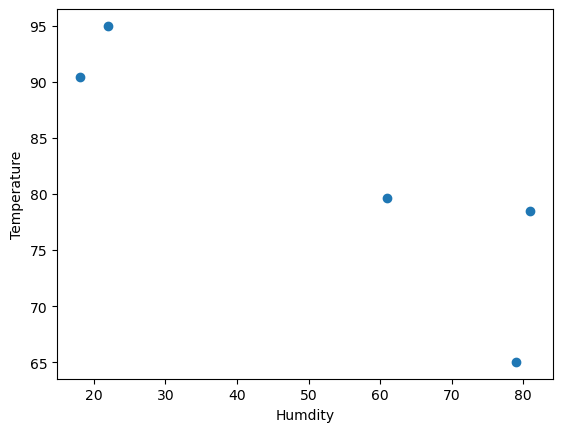

In [5]:
# Create a Scatter Plot for temperature vs latitude
x_values = weather_data['humidity']
y_values = weather_data['temp']
plt.scatter(x_values,y_values)
plt.xlabel('Humdity')
plt.ylabel('Temperature')
plt.show()

In [6]:
# Perform a linear regression on temperature vs. humidity
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0    78.728378
1    93.287894
2    72.633697
3    71.956510
4    91.933521
Name: humidity, dtype: float64


In [7]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.34x +99.38


The r-value is: 0.7808693324148167


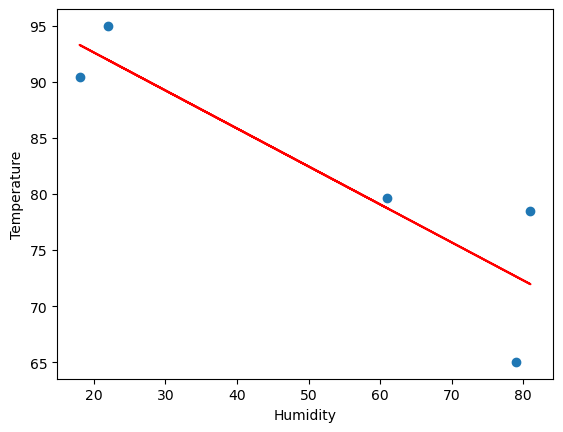

In [8]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()